In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from edward.models import Normal

plt.style.use('ggplot')

import pandas as pd
import numpy as np

c:\users\desh669\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\desh669\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\desh669\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

In [80]:
import datetime
from datetime import datetime

In [2]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul

C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul


In [3]:
df_1st_July_717831 = pd.read_csv('df_1st_July_717831.csv',sep = ',')
df_1st_July_717831 = df_1st_July_717831.drop(['Unnamed: 0','Loop_7_FLOW','Loop_7_Occupancy','Loop_6_FLOW','Loop_6_Occupancy',
                                              'Loop_5_FLOW','Loop_5_Occupancy','Loop_8_FLOW','Loop_8_Occupancy'],axis =1)
print(df_1st_July_717831.shape)
#print(df_1st_July_717831.dtypes)
df_1st_July_717831 = df_1st_July_717831.replace([0,0.0],[" "," "])
df_1st_July_717831 = df_1st_July_717831.replace(r'^\s*$', np.nan, regex=True)
df_1st_July_717831 = df_1st_July_717831.set_index('time',drop = True)
#print(df_1st_July_717831.head())
df_1st_July_717831.info()
df_1st_July_717831.isnull().values.ravel().sum()

(2864, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 20190701000000 to 20190701235930
Data columns (total 9 columns):
VDS_ID              2864 non-null int64
Loop_1_FLOW         2168 non-null float64
Loop_1_Occupancy    2174 non-null float64
Loop_2_FLOW         2510 non-null float64
Loop_2_Occupancy    2511 non-null float64
Loop_3_FLOW         2653 non-null float64
Loop_3_Occupancy    2723 non-null float64
Loop_4_FLOW         2779 non-null float64
Loop_4_Occupancy    2781 non-null float64
dtypes: float64(8), int64(1)
memory usage: 223.8 KB


2613

In [4]:
df_1st_July_717831.dropna().drop(['VDS_ID'],axis = 1).mean(axis=0)

Loop_1_FLOW          4.781907
Loop_1_Occupancy     0.038288
Loop_2_FLOW          9.551589
Loop_2_Occupancy     0.076144
Loop_3_FLOW         11.035697
Loop_3_Occupancy     0.101207
Loop_4_FLOW         11.555990
Loop_4_Occupancy     0.116627
dtype: float64

In [5]:
df_1st_July_717831.dropna().drop(['VDS_ID'],axis = 1).std(axis=0)

Loop_1_FLOW         3.079883
Loop_1_Occupancy    0.026704
Loop_2_FLOW         4.307062
Loop_2_Occupancy    0.038183
Loop_3_FLOW         4.116003
Loop_3_Occupancy    0.075778
Loop_4_FLOW         4.172224
Loop_4_Occupancy    0.050857
dtype: float64

In [6]:
df_1st_July_717831.dropna().drop(['VDS_ID'],axis = 1).cov()

Loop_1_FLOW  Loop_1_Occupancy  Loop_2_FLOW  \
Loop_1_FLOW          9.485680          0.081140     7.063605   
Loop_1_Occupancy     0.081140          0.000713     0.060068   
Loop_2_FLOW          7.063605          0.060068    18.550786   
Loop_2_Occupancy     0.065501          0.000574     0.156655   
Loop_3_FLOW          6.233816          0.052502    12.676484   
Loop_3_Occupancy     0.080209          0.000712     0.141585   
Loop_4_FLOW          6.241669          0.053583    11.017046   
Loop_4_Occupancy     0.080927          0.000721     0.141672   

                  Loop_2_Occupancy  Loop_3_FLOW  Loop_3_Occupancy  \
Loop_1_FLOW               0.065501     6.233816          0.080209   
Loop_1_Occupancy          0.000574     0.052502          0.000712   
Loop_2_FLOW               0.156655    12.676484          0.141585   
Loop_2_Occupancy          0.001458     0.110352          0.001354   
Loop_3_FLOW               0.110352    16.941484          0.111760   
Loop_3_Occupancy          0.001354     0.111760          0.005742   
Loop_4_FLOW               0.095748    11.031024          0.118278   
Loop_4_Occupancy          0.001357     0.138699          0.001769   

                  Loop_4_FLOW  Loop_4_Occupancy  
Loop_1_FLOW          6.241669          0.080927  
Loop_1_Occupancy     0.053583          0.000721  
Loop_2_FLOW         11.017046          0.141672  
Loop_2_Occupancy     0.095748          0.001357  
Loop_3_FLOW         11.031024          0.138699  
Loop_3_Occupancy     0.118278          0.001769  
Loop_4_FLOW         17.407456          0.182076  
Loop_4_Occupancy     0.182076          0.002586

In [7]:
#ignore this cell

# def expectation_maximization(data, max_iter=10):
#     mu0 = df_1st_July_717831.dropna().drop(['VDS_ID'],axis = 1).mean(axis=0)
#     c0 = df_1st_July_717831.dropna().drop(['VDS_ID'],axis = 1).cov()

#     for j in range(max_iter):
#         w = []
#         # perform the E part of algorithm
#         missing = mean
        
        
        

#         # perform the M part of the algorithm
        
#     return mu0, c0

In [8]:
N = 2045
D = 8
K = 2

In [9]:
w = Normal(loc=tf.zeros([D, K]), scale=2.0 * tf.ones([D, K]))
z = Normal(loc=tf.zeros([N, K]), scale=tf.ones([N, K]))
x = Normal(loc=tf.matmul(w, z, transpose_b=True), scale=tf.ones([D, N]))

In [10]:
qw = Normal(loc=tf.get_variable("qw/loc", [D, K]),
            scale=tf.nn.softplus(tf.get_variable("qw/scale", [D, K])))
qz = Normal(loc=tf.get_variable("qz/loc", [N, K]),
            scale=tf.nn.softplus(tf.get_variable("qz/scale", [N, K])))

In [11]:
inference = ed.KLqp({w: qw, z: qz}, data={x: df_1st_July_717831.dropna().drop(['VDS_ID'],axis = 1).T.values})
inference.run(n_iter=500, n_print=100, n_samples=10)

c:\users\desh669\appdata\local\continuum\anaconda3\envs\tensorflow\lib\site-packages\edward\util\random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


500/500 [100%] ██████████████████████████████ Elapsed: 4s | Loss: 39063.039


In [12]:
sess = ed.get_session()
print("Inferred principal axes:")
print(sess.run(qw.mean()))

Inferred principal axes:
[[-2.7140901e+00  1.2289090e+00]
 [-2.3119628e-02  5.8161509e-03]
 [-5.8103027e+00  1.9418796e+00]
 [-4.9204417e-02  1.4841212e-02]
 [-5.1856360e+00  3.7360318e+00]
 [-5.9759833e-02  4.3893501e-02]
 [-2.9372816e+00  6.5980992e+00]
 [-3.9332792e-02  5.8516644e-02]]


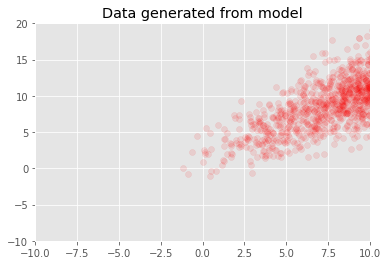

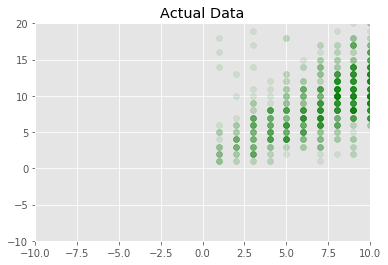

In [21]:
# Build and then generate data from the posterior predictive distribution.
x_post = ed.copy(x, {w: qw, z: qz})
x_gen = sess.run(x_post)

plt.scatter(x_gen[4, :], x_gen[6, :], color='red', alpha=0.1)
plt.axis([-10, 10, -10, 20])
plt.title("Data generated from model")
plt.show()

plt.scatter(df_1st_July_717831.dropna().drop(['VDS_ID'],axis = 1).T.values[4, :], 
            df_1st_July_717831.dropna().drop(['VDS_ID'],axis = 1).T.values[6, :], color='green', alpha=0.1)
plt.axis([-10, 10, -10, 20])
plt.title("Actual Data")
plt.show()

In [58]:
from ppca import PPCA

In [59]:
ppca = PPCA()

In [60]:
df_1st_July_717831.shape

(2864, 9)

In [61]:
ppca.fit(df_1st_July_717831.drop(['VDS_ID'],axis = 1).values,d = 3, verbose=False)

In [62]:
variance_explained = ppca.var_exp
components = ppca.data
model_params = ppca.C

In [63]:
component_mat = ppca.transform()

In [64]:
component_mat

array([[ 3.85645102,  0.02810592, -0.20918603],
       [ 3.07104898, -0.21179714,  0.19421559],
       [ 2.00869653, -0.12198448,  0.29840544],
       ...,
       [ 3.35850939,  0.06742996, -0.31396383],
       [ 3.06904692,  0.11021096, -0.24233682],
       [ 0.        ,  0.        ,  0.        ]])

In [65]:
variance_explained

array([0.71137659, 0.81645451, 0.91367221])

In [66]:
model_params

array([[-0.32191834,  0.44411338, -0.43982412],
       [-0.32123219,  0.43899686, -0.44776498],
       [-0.40062495, -0.04918216,  0.18383321],
       [-0.40316294, -0.0337225 ,  0.15261984],
       [-0.38151402, -0.10326165,  0.22540186],
       [-0.1862987 , -0.76102147, -0.62094346],
       [-0.37690221, -0.09130861,  0.25549151],
       [-0.38447668, -0.0912966 ,  0.21753417]])

In [45]:
ppca.eig_vals

array([5.61168962, 0.8294208 ])

In [68]:
components.shape

(2864, 8)

In [69]:
df_1st_July_717831.shape

(2864, 9)

In [70]:
plot_this_data = df_1st_July_717831.drop(['VDS_ID'],axis = 1)

In [108]:
Lane1 = plot_this_data['Loop_1_FLOW']
Lane2 = plot_this_data['Loop_2_FLOW']
Lane3 = plot_this_data['Loop_3_FLOW']
Lane4 = plot_this_data['Loop_4_FLOW']

In [82]:
index_list = []

plot_this_data.index = plot_this_data.index.astype(str)
for i in plot_this_data.index:
    d = datetime.strptime(i,'%Y%m%d%H%M%S')
    index_list.append(d)

Loop_1_FLOW  Loop_1_Occupancy  Loop_2_FLOW  Loop_2_Occupancy  \
time                                                                           
20190701000000          1.0            0.0078          1.0            0.0067   
20190701000030          1.0            0.0078          NaN            0.0011   
20190701000100          2.0            0.0156          5.0            0.0422   
20190701000130          NaN               NaN          1.0            0.0089   
20190701000200          NaN               NaN          1.0            0.0078   

                Loop_3_FLOW  Loop_3_Occupancy  Loop_4_FLOW  Loop_4_Occupancy  
time                                                                          
20190701000000          1.0            0.0078          1.0            0.0078  
20190701000030          3.0            0.0211          4.0            0.0522  
20190701000100          4.0            0.0322          7.0            0.0533  
20190701000130          2.0            0.0178          2.0            0.0178  
20190701000200          2.0            0.0178          4.0            0.0522

In [84]:
plot_this_data.index = index_list

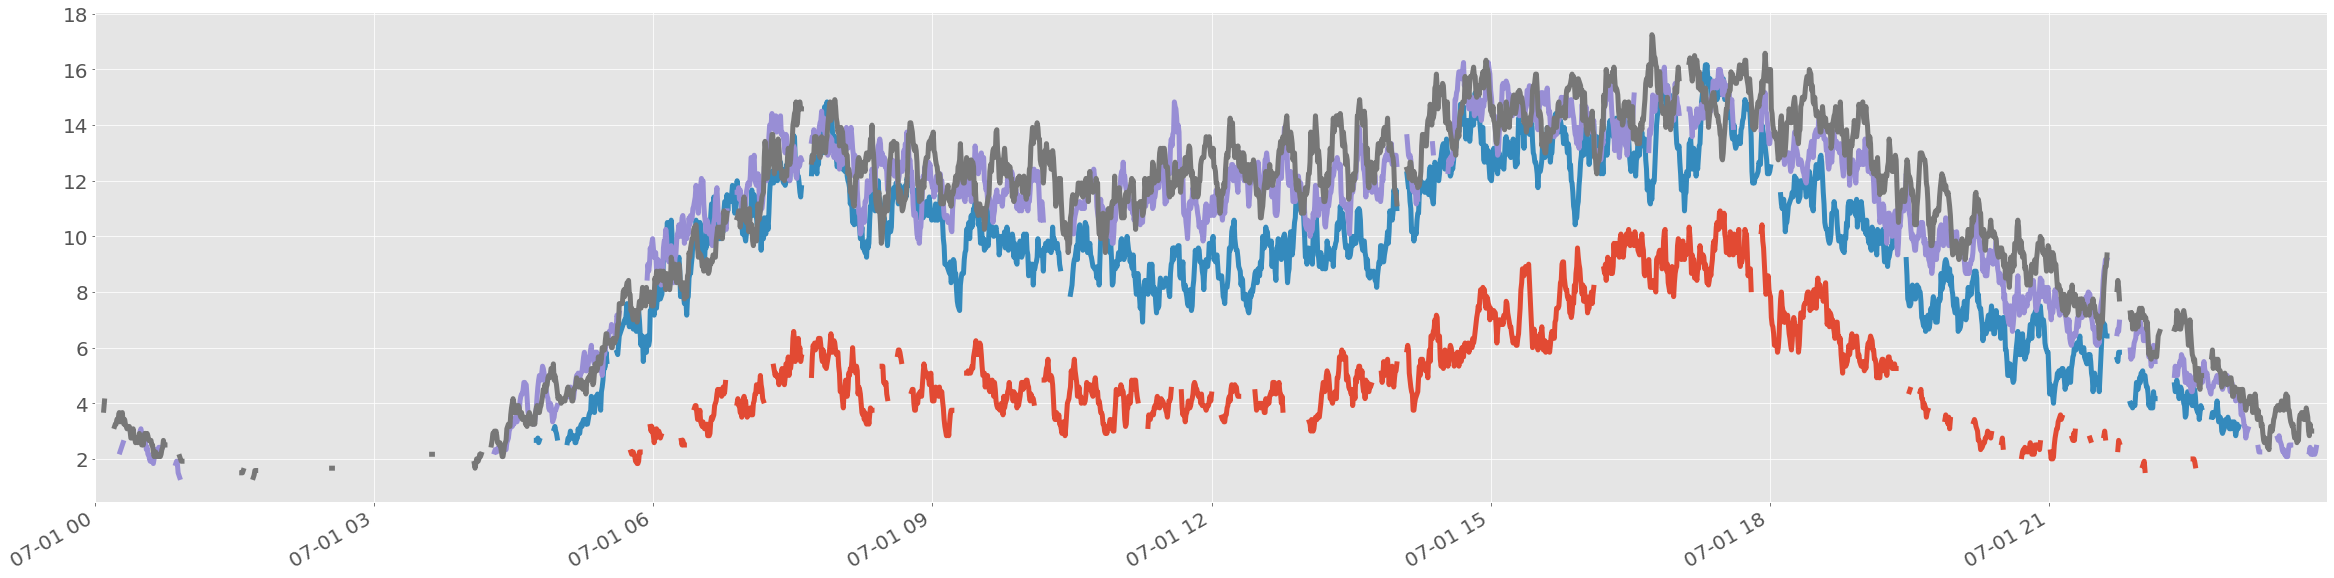

In [109]:
Lane1.rolling(12).mean().plot(figsize=(40,10), linewidth=5, fontsize=20)
Lane2.rolling(12).mean().plot(figsize=(40,10), linewidth=5, fontsize=20)
Lane3.rolling(12).mean().plot(figsize=(40,10), linewidth=5, fontsize=20)
Lane4.rolling(12).mean().plot(figsize=(40,10), linewidth=5, fontsize=20)


In [110]:
colnames = ['Lane_1_Flow','Lane_2_Flow','Lane_3_Flow','Lane_4_Flow','Lane_1_Occ','Lane_2_Occ','Lane_3_Occ','Lane_4_Occ']

In [113]:
dataset = pd.DataFrame({'Lane_1_Flow': components[:, 0], 'Lane_2_Flow': components[:, 1],
                        'Lane_3_Flow': components[:, 2], 'Lane_4_Flow': components[:, 3],
                        'Lane_1_Occ': components[:, 4], 'Lane_2_Occ': components[:, 5],
                        'Lane_3_Occ': components[:, 6], 'Lane_4_Occ': components[:, 7]                     
                       })
dataset.index = index_list

In [114]:
dataset.head()

Lane_1_Flow  Lane_2_Flow  Lane_3_Flow  Lane_4_Flow  \
2019-07-01 00:00:00    -1.188808    -1.102698    -1.561981    -1.469925   
2019-07-01 00:00:30    -1.188808    -1.102698    -1.122301    -1.605284   
2019-07-01 00:01:00    -0.868443    -0.814472    -0.727817    -0.611850   
2019-07-01 00:01:30    -0.989051    -0.985995    -1.561981    -1.416749   
2019-07-01 00:02:00    -0.897229    -0.894970    -1.561981    -1.443337   

                     Lane_1_Occ  Lane_2_Occ  Lane_3_Occ  Lane_4_Occ  
2019-07-01 00:00:00   -1.601017   -0.612611   -1.618156   -1.472953  
2019-07-01 00:00:30   -1.209885   -0.529975   -1.051588   -0.729947  
2019-07-01 00:01:00   -1.014319   -0.461008   -0.485019   -0.711540  
2019-07-01 00:01:30   -1.405451   -0.550479   -1.429300   -1.305610  
2019-07-01 00:02:00   -1.405451   -0.550479   -1.051588   -0.729947

In [117]:
Lane1 = dataset['Lane_1_Flow']
Lane2 = dataset['Lane_2_Flow']
Lane3 = dataset['Lane_3_Flow']
Lane4 = dataset['Lane_4_Flow']

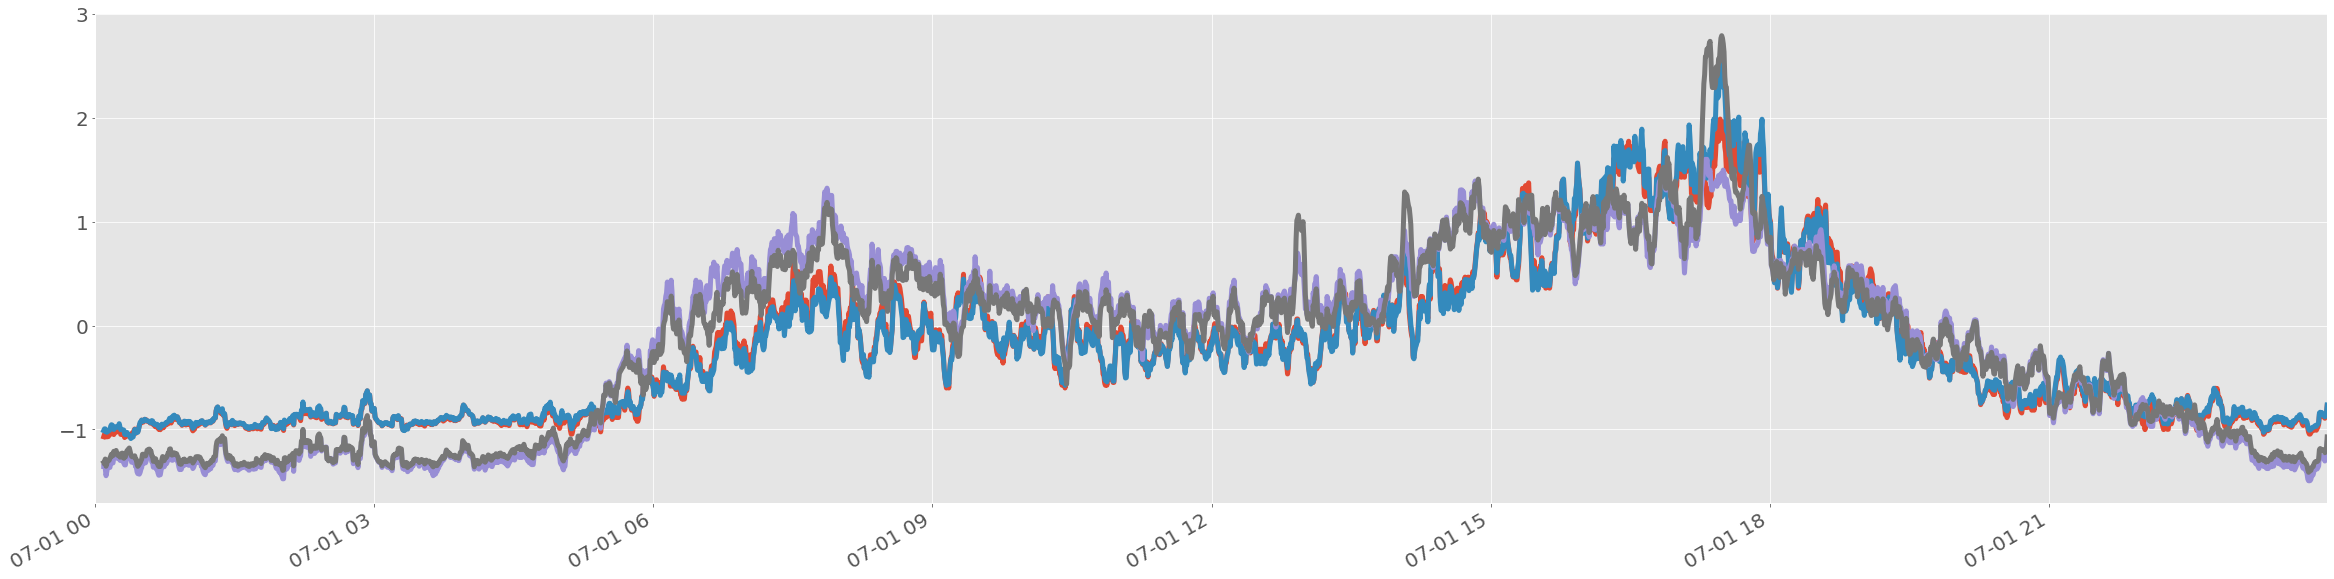

In [118]:
Lane1.rolling(12).mean().plot(figsize=(40,10), linewidth=5, fontsize=20)
Lane2.rolling(12).mean().plot(figsize=(40,10), linewidth=5, fontsize=20)
Lane3.rolling(12).mean().plot(figsize=(40,10), linewidth=5, fontsize=20)
Lane4.rolling(12).mean().plot(figsize=(40,10), linewidth=5, fontsize=20)